In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [72]:
import pickle

# load in labels and samples for the training subset
training_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore/train_samples.pkl', 'rb')
training_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore/train_labels.pkl', 'rb')

# load in labels and samples for the test subset
test_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore/test_samples.pkl', 'rb')
test_labels_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore/test_labels.pkl', 'rb')

In [73]:
# training
X = pickle.load(training_samples_file)
y = pickle.load(training_labels_file)

# test
test_samples = pickle.load(test_samples_file)
test_labels = pickle.load(test_labels_file)

In [74]:
no_speech_train_y = []
for i in range(450):
  no_speech_train_y.append(2)

In [75]:
import numpy as np
no_speech_train_y = np.array(no_speech_train_y)

In [76]:
y = np.append(y, no_speech_train_y)

In [77]:
len(y)

1350

In [78]:
no_speech_test_y = []
for i in range(50):
  no_speech_test_y.append(2)

In [79]:
no_speech_test_y = np.array(no_speech_test_y)

In [80]:
test_labels = np.append(test_labels, no_speech_test_y)

In [81]:
len(test_labels)

150

In [82]:
all_no_speech_samples_file = open('/content/drive/MyDrive/Mignot Lab Research/Experiments/speech-vs-snore-vs-no-sound/no_speech_samples.pkl', 'rb')
all_no_speech_samples = pickle.load(all_no_speech_samples_file)

In [83]:
train_no_speech = all_no_speech_samples[:450]

In [84]:
train_no_speech.shape

(450, 128, 44)

In [85]:
array1 = np.concatenate([X, train_no_speech])

In [86]:
len(array1)

1350

In [87]:
X = array1

In [88]:
test_no_speech = all_no_speech_samples[450:]

In [89]:
len(test_no_speech)

50

In [90]:
test_samples = np.concatenate([test_samples, test_no_speech])

### LSTM 

In [111]:
X[0].shape

(128, 44)

In [112]:
import tensorflow as tf
import keras

model = keras.Sequential()
model.add(keras.layers.LSTM(64, input_shape=(128, 44), return_sequences=True))
model.add(keras.layers.LSTM(64))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(3, activation='softmax'))

In [113]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128, 64)           27904     
_________________________________________________________________
lstm_5 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 195       
Total params: 65,283
Trainable params: 65,283
Non-trainable params: 0
_________________________________________________________________


In [114]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [115]:
history = model.fit(X, y, epochs=1000)

Epoch 1/1000
43/43 [==============================] - 3s 16ms/step - loss: 0.9849 - accuracy: 0.4987
Epoch 2/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.5208 - accuracy: 0.8196
Epoch 3/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.3596 - accuracy: 0.8821
Epoch 4/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.2911 - accuracy: 0.9156
Epoch 5/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.3726 - accuracy: 0.8512
Epoch 6/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.3768 - accuracy: 0.8242
Epoch 7/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.2974 - accuracy: 0.8971
Epoch 8/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.3145 - accuracy: 0.8975
Epoch 9/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.2833 - accuracy: 0.9095
Epoch 10/1000
43/43 [==============================] - 1s 14ms/step - loss: 0.2570 - accura

In [116]:
history_dict = history.history
print(history_dict.keys())
# to keep for later 
%store history_dict

dict_keys(['loss', 'accuracy'])
Stored 'history_dict' (dict)


In [117]:
# imports 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

In [118]:
# function to plot training given history dictionary 
def plot_training(history_dict):
	"""
	Plots the training accuracy and loss graphs for a Keras model (validation graphs not included). 
	Parameters:
		- history_dict: a dictionary of "history" object from Keras 
	"""
	# plot training accuracy graph 
	plt.plot(history_dict['accuracy'])
	plt.title('Training Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

	# plot training loss graph 
	plt.plot(history_dict['loss'])
	plt.title('Training Loss')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train'], loc='upper left')
	plt.show()

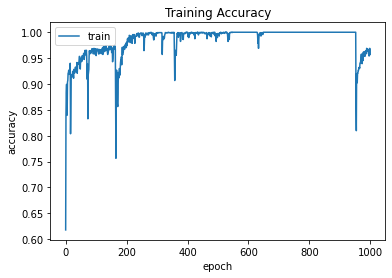

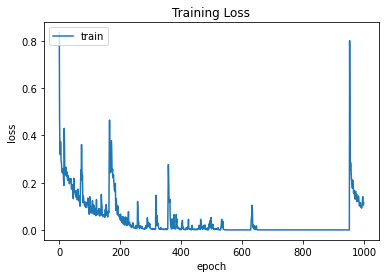

In [119]:
plot_training(history_dict)

In [120]:
test_loss, test_accuracy = model.evaluate(test_samples,  test_labels, verbose=2)
print('Test accuracy:', test_accuracy)

5/5 - 1s - loss: 0.1081 - accuracy: 0.9533
Test accuracy: 0.95333331823349


In [121]:
predictions = model.predict_classes(test_samples) # generates a list of predictions

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [122]:
print("Test labels: \n", test_labels)
print("Test predictions: \n", predictions)

Test labels: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Test predictions: 
 [0 0 0 0 2 0 2 0 2 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [123]:
correct = 0
for i in range(len(predictions)):
  if predictions[i] == test_labels[i]:
    correct += 1

In [124]:
predictions_accuracy = correct/len(test_labels)
predictions_accuracy

0.9533333333333334

In [125]:
print("The accuracy is: " + str(round(predictions_accuracy * 100, 1)) + "%")

The accuracy is: 95.3%


### Confusion matrix and classification report

In [126]:
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

In [127]:
cm = confusion_matrix(test_labels, predictions)

In [128]:
def plot_cm(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
    cm = cm.astypea('float') / cm.sum(axis=1)[:, np.newaxis]
    print('Normalized confusion matrix')
  else:
    print('Confusion matrix without normalization')

  print(cm)

  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")
  
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Confusion matrix without normalization
[[43  0  7]
 [ 0 50  0]
 [ 0  0 50]]


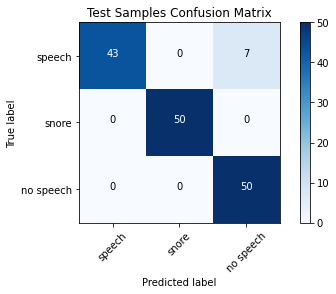

In [129]:
plot_cm(cm, ['speech', 'snore','no speech'], title='Test Samples Confusion Matrix')

In [130]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, predictions, target_names=['no speech','speech']))

ValueError: ignored